In [1]:
import pandas as pd

# Load the dataset
file_path = "E:/UE Sose2024/Sem 1/DSS/titanic.csv"
data = pd.read_csv(file_path)
print(data.info())
print(data.head())
print(data.describe().T)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [2]:
data_cleaned = data.copy()
# Fill missing Age with the median
data_cleaned['Age'].fillna(data_cleaned['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
data_cleaned['Embarked'].fillna(data_cleaned['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
data_cleaned.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
data_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [3]:
data_cleaned_converted = data_cleaned.copy()

# Convert columns to category type
data_cleaned_converted['Survived'] = data_cleaned_converted['Survived'].astype('category')
data_cleaned_converted['Pclass'] = data_cleaned_converted['Pclass'].astype('category')
data_cleaned_converted['Sex'] = data_cleaned_converted['Sex'].astype('category')
data_cleaned_converted['Embarked'] = data_cleaned_converted['Embarked'].astype('category')

# Verify the changes
data_cleaned_converted.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [4]:
# Describe the data to see the statistics
data_cleaned_converted.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


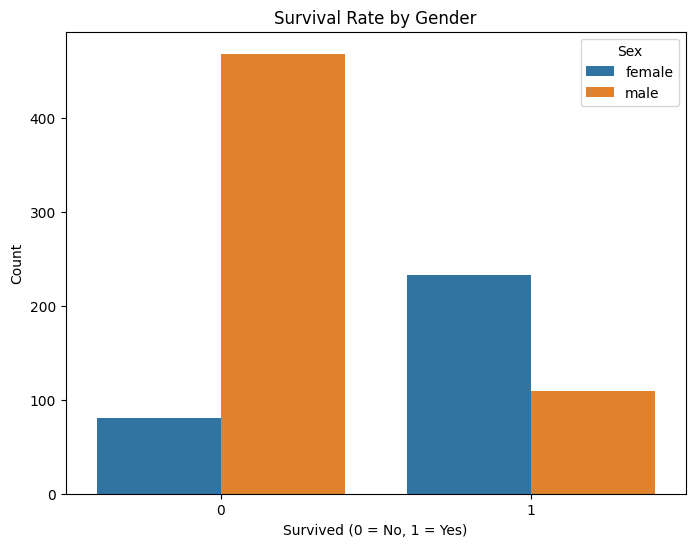

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=data_cleaned_converted)
plt.title('Survival Rate by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

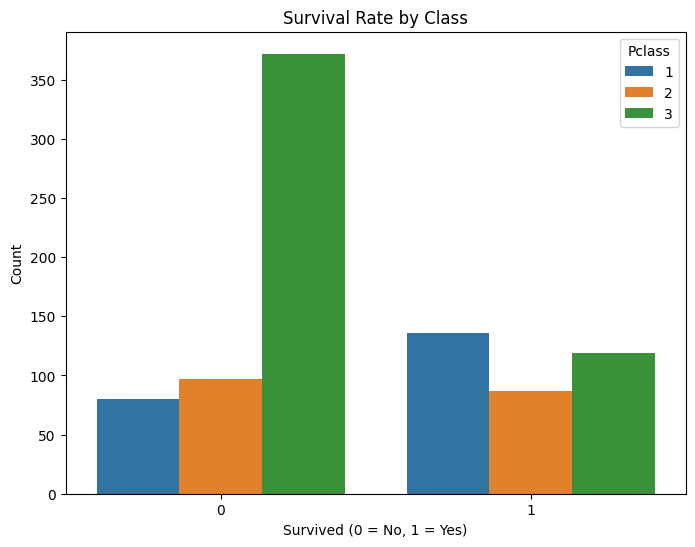

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=data_cleaned_converted)
plt.title('Survival Rate by Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


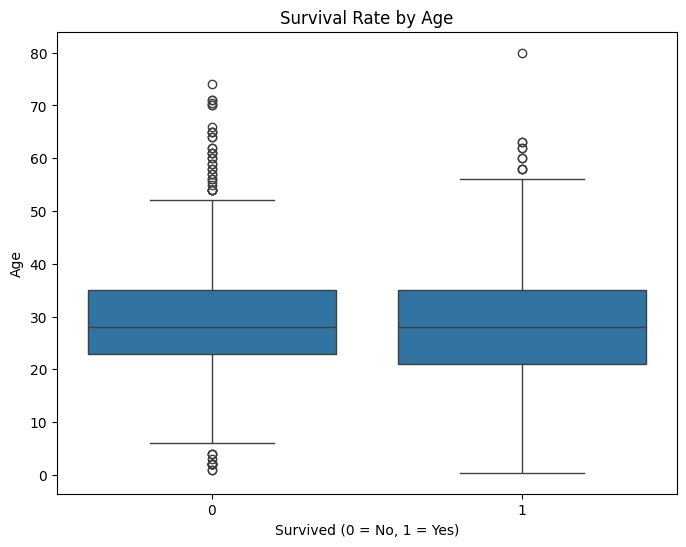

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=data_cleaned_converted)
plt.title('Survival Rate by Age')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


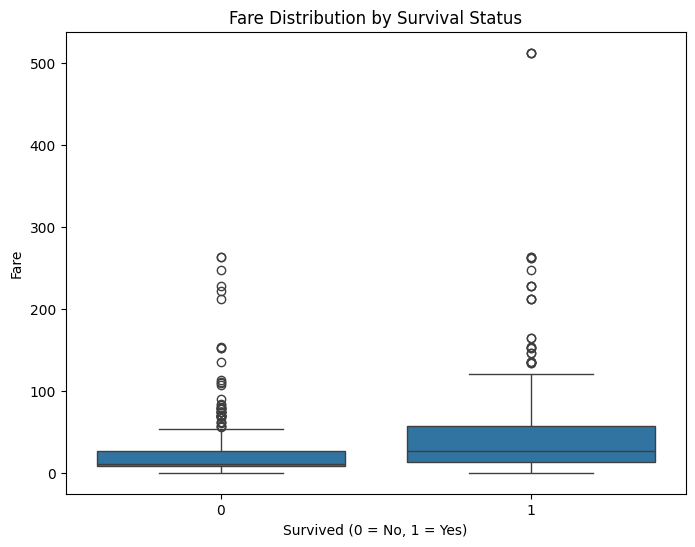

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=data_cleaned_converted)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

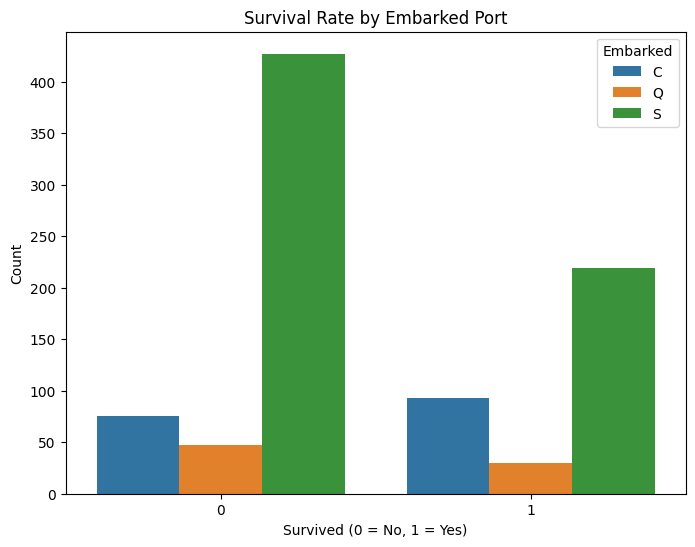

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Embarked', data=data_cleaned_converted)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

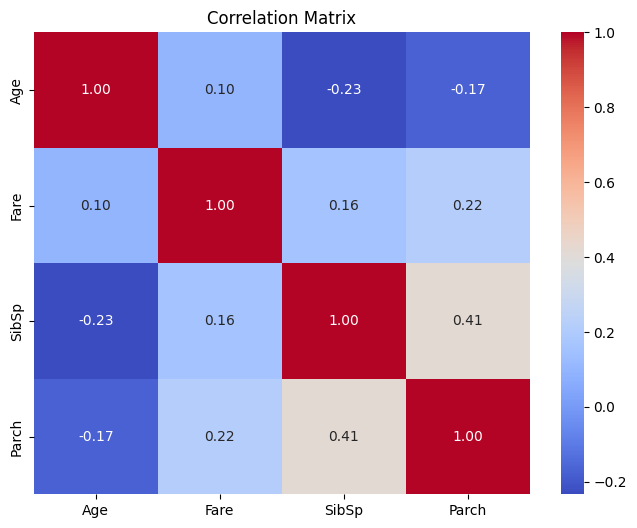

In [11]:
# Correlation Heatmap
corr_matrix = data_cleaned_converted[['Age', 'Fare', 'SibSp', 'Parch',]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
import scipy.stats as stats

# Chi-Square Test for categorical features (e.g., Sex, Pclass, Embarked)
contingency = pd.crosstab(data_cleaned_converted['Survived'], data_cleaned_converted['Sex'])
chi2, p, dof, ex = stats.chi2_contingency(contingency)
print(f"Chi-Square Test result for Sex: p-value = {p}")

# ANOVA for numerical features (e.g., Age, Fare)
f_stat, p_val = stats.f_oneway(data_cleaned_converted[data_cleaned_converted['Survived'] == 1]['Age'], data_cleaned_converted[data_cleaned_converted['Survived'] == 0]['Age'])
print(f"ANOVA test result for Age: p-value = {p_val}")

Chi-Square Test result for Sex: p-value = 1.1973570627755645e-58
ANOVA test result for Age: p-value = 0.052760688475835


In [13]:
data_fe = data_cleaned_converted.copy()
# Extract titles from the Name column
data_fe['Title'] = data_fe['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Create FamilySize feature by combining SibSp and Parch
data_fe['FamilySize'] = data_fe['SibSp'] + data_fe['Parch'] + 1  # Adding 1 for the passenger themselves

In [14]:
# Create age bins and labels
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
data_fe['AgeGroup'] = pd.cut(data_fe['Age'], bins=bins, labels=labels)

In [15]:
# Create a new feature to indicate if the passenger was traveling alone
data_fe['IsAlone'] = (data_fe['FamilySize'] == 1).astype(int)

In [16]:
data_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeGroup,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,Adult,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,Adult,1


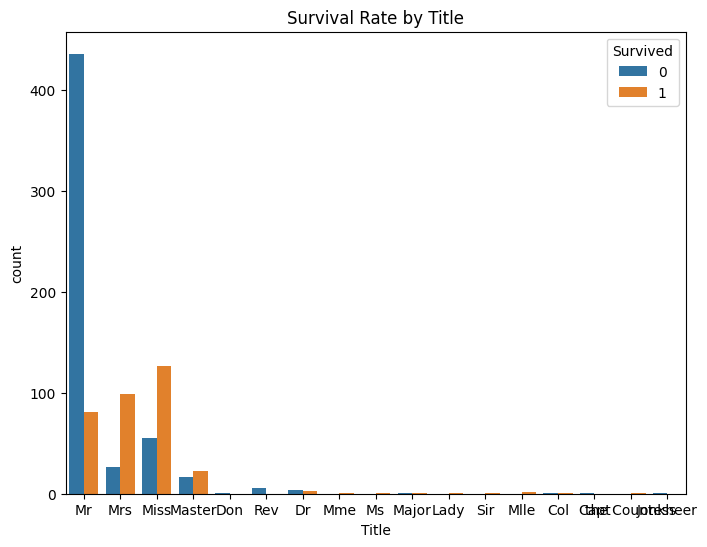

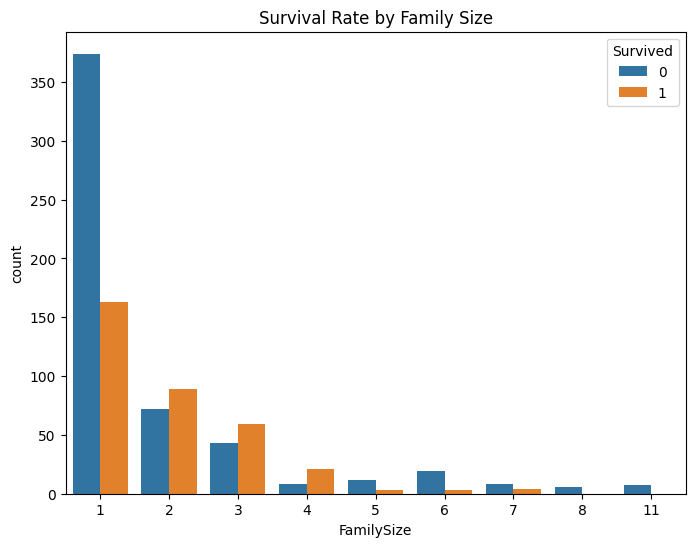

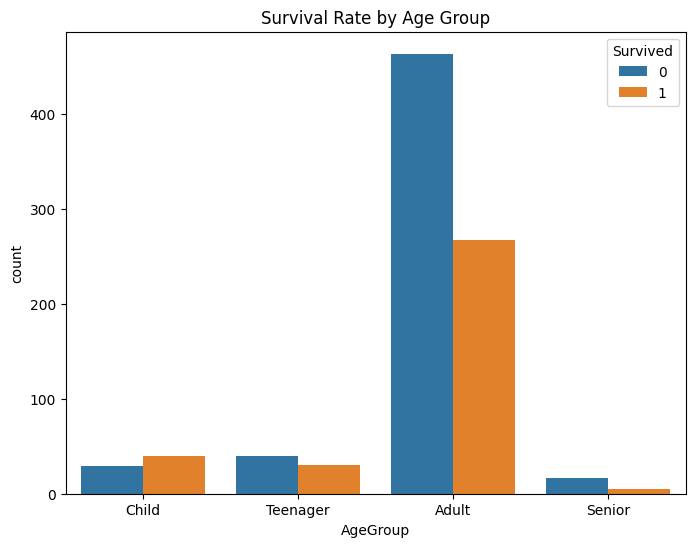

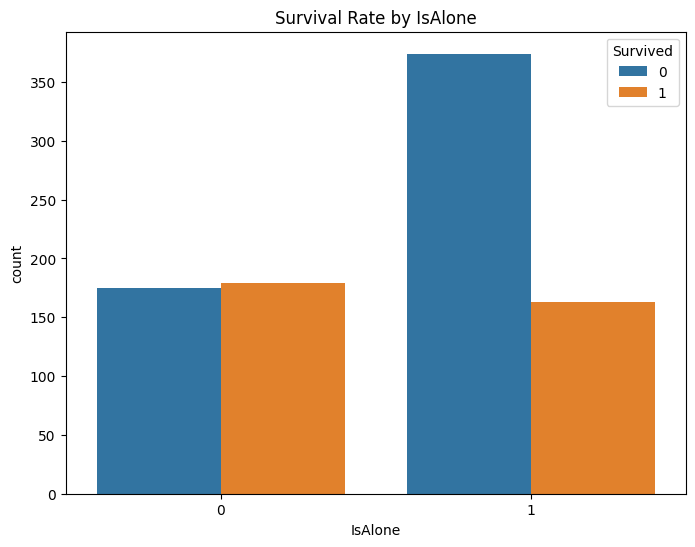

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival Rate by Title
plt.figure(figsize=(8, 6))
sns.countplot(data=data_fe, x='Title', hue='Survived')
plt.title('Survival Rate by Title')
plt.show()

# Survival Rate by FamilySize
plt.figure(figsize=(8, 6))
sns.countplot(data=data_fe, x='FamilySize', hue='Survived')
plt.title('Survival Rate by Family Size')
plt.show()

# Survival Rate by AgeGroup
plt.figure(figsize=(8, 6))
sns.countplot(data=data_fe, x='AgeGroup', hue='Survived')
plt.title('Survival Rate by Age Group')
plt.show()

# Survival Rate by IsAlone
plt.figure(figsize=(8, 6))
sns.countplot(data=data_fe, x='IsAlone', hue='Survived')
plt.title('Survival Rate by IsAlone')
plt.show()

In [18]:
data_fe.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
Title            object
FamilySize        int64
AgeGroup       category
IsAlone           int32
dtype: object

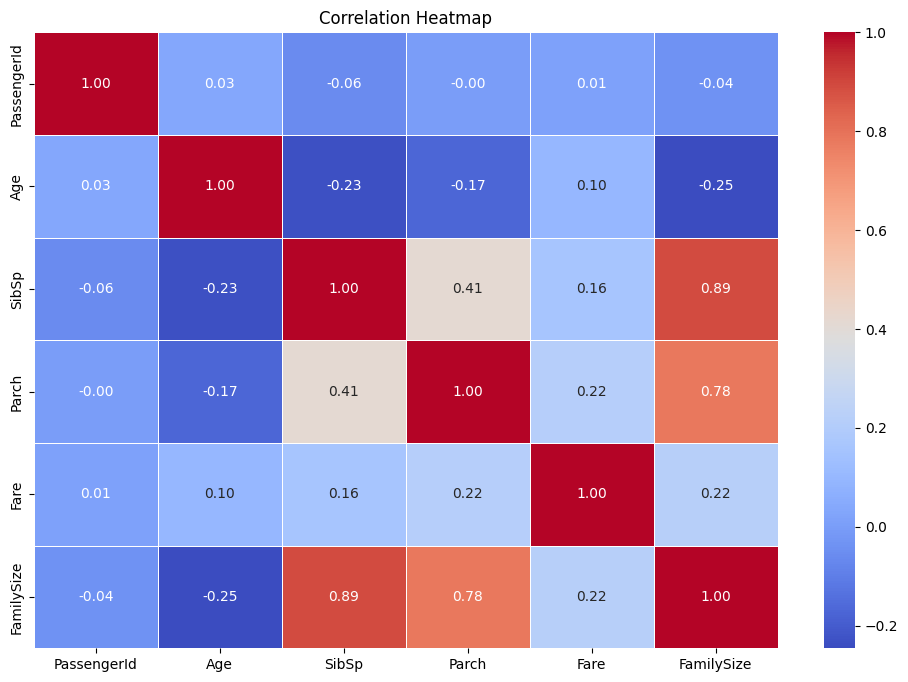

In [19]:
# Select only numeric columns for correlation matrix
numeric_data = data_fe.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


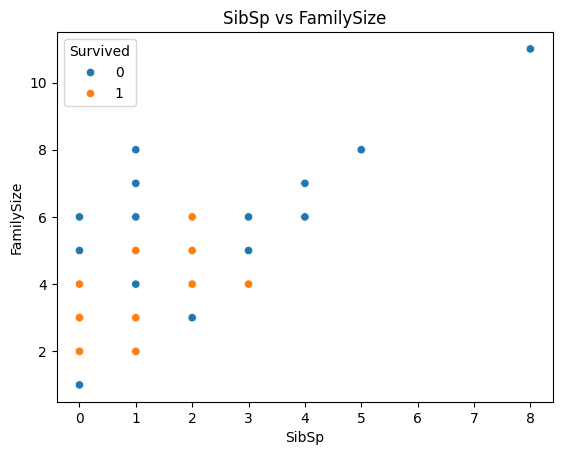

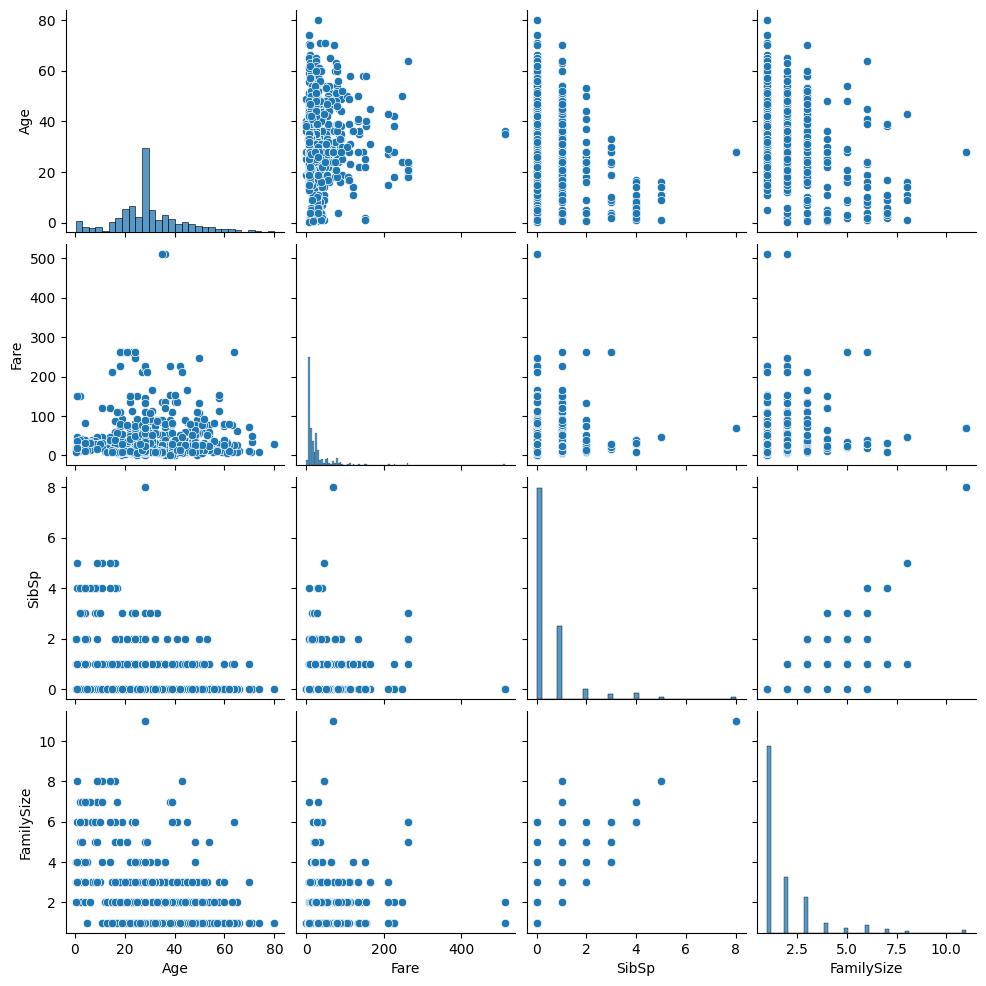

In [20]:
# Scatter plot between SibSp and FamilySize
sns.scatterplot(data=data_fe, x='SibSp', y='FamilySize', hue='Survived')
plt.title('SibSp vs FamilySize')
plt.show()

# Pairplot to visualize relationships between multiple features
sns.pairplot(data_fe[['Age', 'Fare', 'SibSp', 'FamilySize', 'Survived']])
plt.show()

In [26]:
import pandas as pd

# Select continuous variables (features) where we need to check for outliers
continuous_features = ['Age', 'Fare']

# Function to calculate IQR and detect outliers
def detect_outliers_iqr(df, continuous_features):
    outliers = {}
    for feature in continuous_features:
        # Calculate Q1, Q3, and IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return outliers

# Apply the function to detect outliers
outliers = detect_outliers_iqr(data_fe, continuous_features)

# Print the outliers found for each feature
for feature, outlier_data in outliers.items():
    print(f"Outliers detected in {feature}:")
    print(outlier_data[feature].head())  # Display first few outliers for each feature


Outliers detected in Age:
7      2.0
11    58.0
15    55.0
16     2.0
33    66.0
Name: Age, dtype: float64
Outliers detected in Fare:
1      71.2833
27    263.0000
31    146.5208
34     82.1708
52     76.7292
Name: Fare, dtype: float64


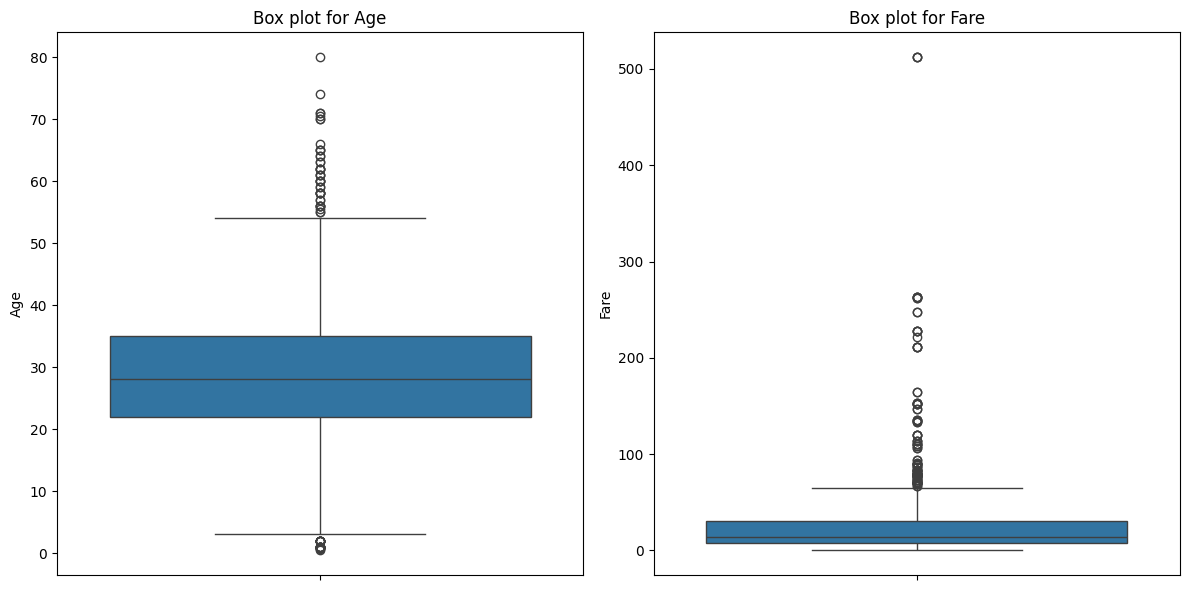

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for Age and Fare
plt.figure(figsize=(12, 6))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(data_fe['Age'])
plt.title('Box plot for Age')

# Box plot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(data_fe['Fare'])
plt.title('Box plot for Fare')

plt.tight_layout()
plt.show()


In [29]:
data_replace_outliers = data_fe.copy()
# Cap or clip outliers for 'Age' and 'Fare'
for feature in ['Age', 'Fare']:
    Q1 = data_replace_outliers[feature].quantile(0.25)
    Q3 = data_replace_outliers[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values outside the bounds
    data_replace_outliers[feature] = data_replace_outliers[feature].clip(lower=lower_bound, upper=upper_bound)

# Check the data after clipping
print(data_replace_outliers[['Age', 'Fare']].describe())


              Age        Fare
count  891.000000  891.000000
mean    29.039282   24.046813
std     12.072074   20.481625
min      2.500000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     54.500000   65.634400


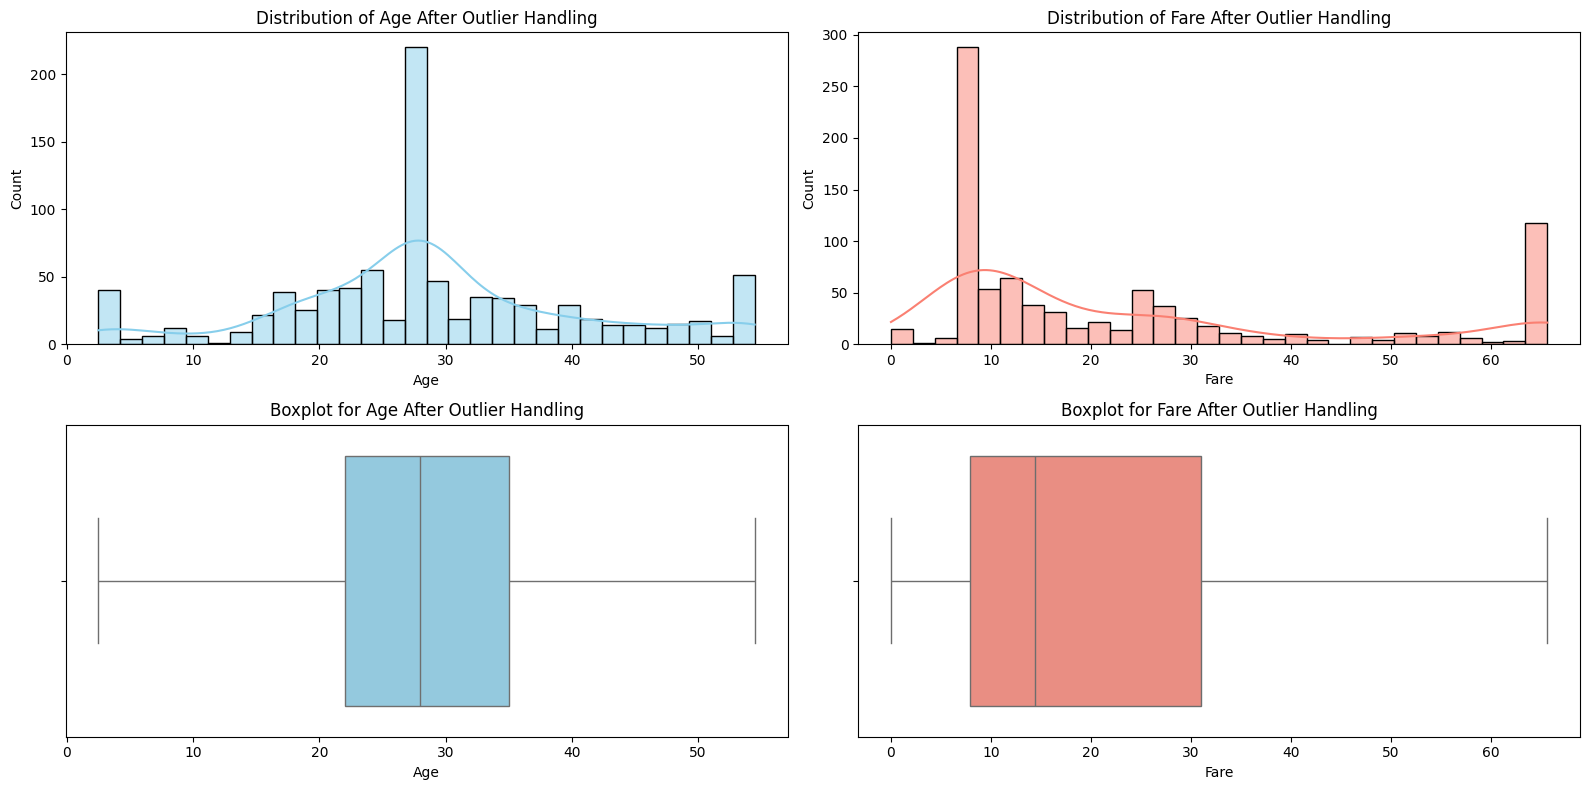

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for multiple plots
plt.figure(figsize=(16, 8))

# Histogram for Age
plt.subplot(2, 2, 1)
sns.histplot(data_replace_outliers['Age'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Age After Outlier Handling')

# Histogram for Fare
plt.subplot(2, 2, 2)
sns.histplot(data_replace_outliers['Fare'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Fare After Outlier Handling')

# Boxplot for Age
plt.subplot(2, 2, 3)
sns.boxplot(x=data_replace_outliers['Age'], color='skyblue')
plt.title('Boxplot for Age After Outlier Handling')

# Boxplot for Fare
plt.subplot(2, 2, 4)
sns.boxplot(x=data_replace_outliers['Fare'], color='salmon')
plt.title('Boxplot for Fare After Outlier Handling')

# Show the plots
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

# Create a copy of the original dataframe to preserve the original data
data_encoded = data_replace_outliers.copy()

# Step 1: Label Encoding for binary categorical variables
# Encode 'Sex' (male = 1, female = 0)
data_encoded['Sex'] = data_encoded['Sex'].map({'male': 1, 'female': 0})

# Encode 'IsAlone' (1 = alone, 0 = with family)
# It's already in 0 or 1, so no need for further transformation
# data_encoded['IsAlone'] is already encoded as 0 or 1

# Step 2: One-Hot Encoding for variables with multiple categories
# For 'Embarked', 'AgeGroup', and 'Title'
data_encoded = pd.get_dummies(data_encoded, columns=['Embarked', 'AgeGroup', 'Title'], drop_first=True)

# Check the first few rows of the encoded data
data_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,True,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,65.6344,...,False,False,False,False,False,True,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,False,True,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,False,False,False,False,False,True,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,False,False,False,False,True,False,False,False,False,False


In [32]:
# Features (X) and Target (y)
X = data_encoded.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = data_encoded['Survived']


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
model = LogisticRegression(max_iter=500)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


Accuracy: 0.8212290502793296
Confusion Matrix:
[[89 16]
 [16 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



E:\Anaconda_files\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}')
print(f'Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}')


Random Forest Accuracy: 0.8324022346368715
Random Forest Confusion Matrix:
[[89 16]
 [14 60]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [37]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Sex' column (if it’s not already numeric)
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = label_encoder.transform(X_test['Sex'])

# If 'Pclass' is already numeric, no need to encode it
# But if it's a categorical column, you can uncomment the following lines to encode it:
# X_train['Pclass'] = label_encoder.fit_transform(X_train['Pclass'])
# X_test['Pclass'] = label_encoder.transform(X_test['Pclass'])

# Now let's train the XGBoost model again
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print(f'XGBoost Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred_xgb)}')


XGBoost Accuracy: 0.8379888268156425
XGBoost Confusion Matrix:
[[92 13]
 [16 58]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



E:\Anaconda_files\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1200x800 with 0 Axes>

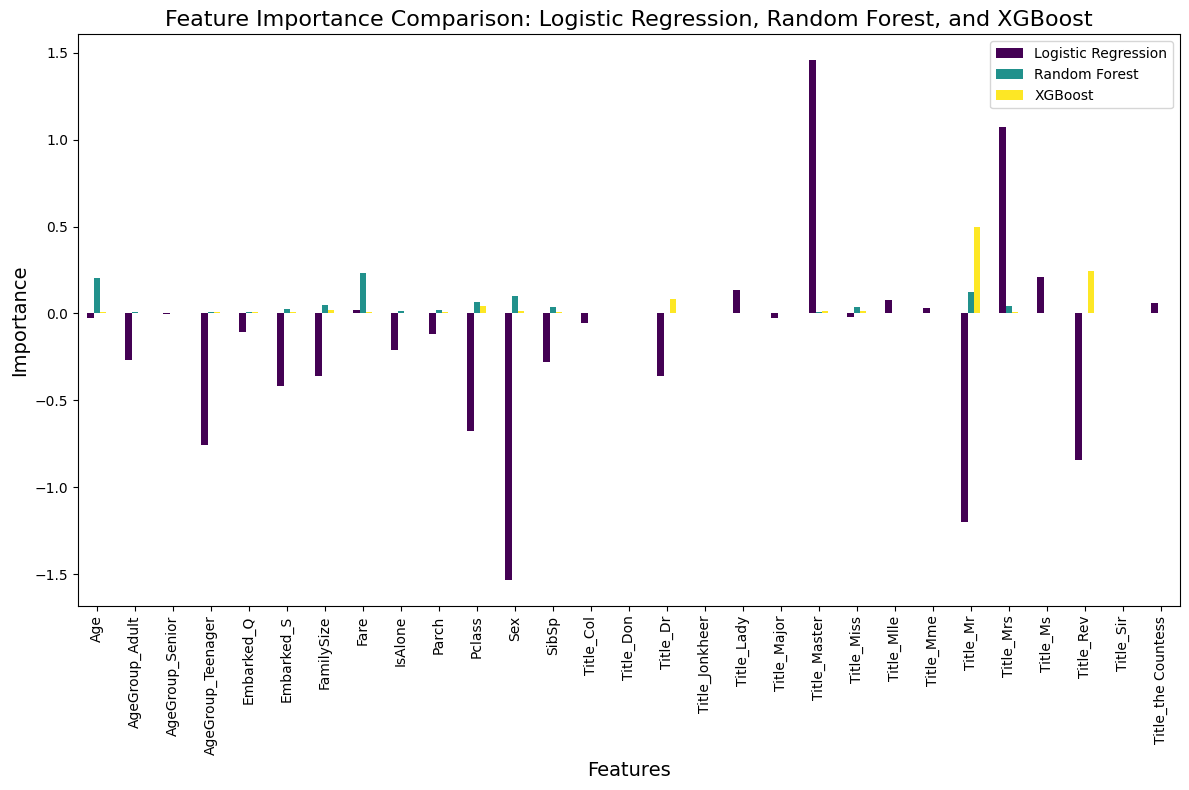

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Logistic Regression feature importance (absolute value of coefficients)
log_reg_importance = pd.Series(model.coef_[0], index=X_train.columns).sort_values(ascending=False)

# Random Forest feature importance
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# XGBoost feature importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Create a DataFrame to compare the importance
importance_df = pd.DataFrame({
    'Logistic Regression': log_reg_importance,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
})

# Plot the feature importance for all three models
plt.figure(figsize=(12, 8))

# Plot each model's importance
importance_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')

# Set plot titles and labels
plt.title('Feature Importance Comparison: Logistic Regression, Random Forest, and XGBoost', fontsize=16)
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
import numpy as np
import pandas as pd

# Logistic Regression: Get feature importance from the model coefficients (absolute value)
log_reg_importance = np.abs(model.coef_[0])
log_reg_features = X.columns

# Create a DataFrame for Logistic Regression feature importance
log_reg_importance_df = pd.DataFrame({'Feature': log_reg_features, 'Importance': log_reg_importance})
log_reg_importance_df = log_reg_importance_df.sort_values(by='Importance', ascending=False)

# Random Forest: Get feature importance from the Random Forest model
rf_importance = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# XGBoost: Get feature importance from the XGBoost model
xgb_importance = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Combine all the importance data into one DataFrame for comparison
combined_importance_df = pd.DataFrame({
    'Feature': log_reg_importance_df['Feature'],
    'Logistic Regression': log_reg_importance_df['Importance'],
    'Random Forest': rf_importance_df['Importance'],
    'XGBoost': xgb_importance_df['Importance']
})

# Display the top 10 most important features from all models
print(combined_importance_df.head(10))


      Feature  Logistic Regression  Random Forest   XGBoost
0      Pclass             0.674365       0.065843  0.043192
1         Sex             1.532877       0.103400  0.013795
2         Age             0.028040       0.203124  0.008964
3       SibSp             0.280853       0.034677  0.007263
4       Parch             0.115805       0.022207  0.006811
5        Fare             0.019164       0.230233  0.011101
6  FamilySize             0.357091       0.049809  0.019419
7     IsAlone             0.207843       0.012212  0.000000
8  Embarked_Q             0.104926       0.009856  0.006519
9  Embarked_S             0.417545       0.023835  0.008588


Cross-Validation Scores:
                        Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Logistic Regression  0.846154  0.832168  0.816901  0.802817  0.809859
Random Forest        0.776224  0.783217  0.781690  0.767606  0.823944
Gradient Boosting    0.818182  0.846154  0.809859  0.852113  0.809859


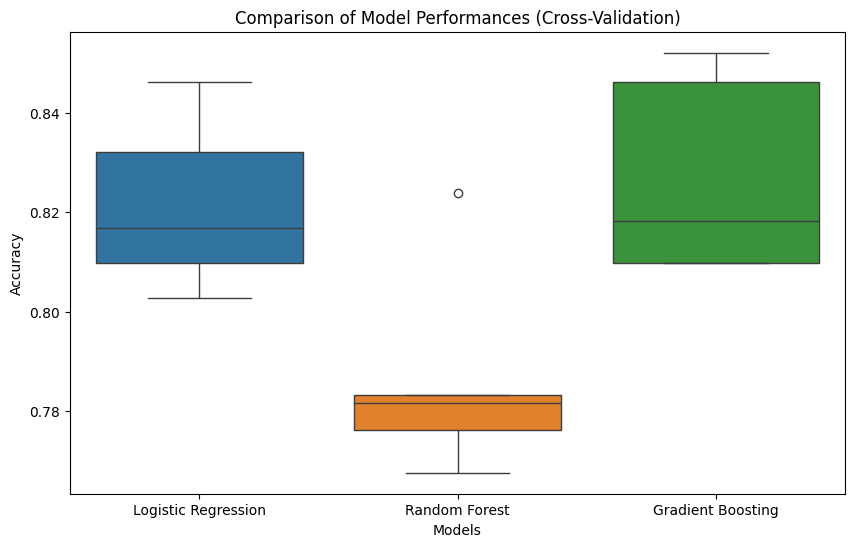

Logistic Regression: Mean Accuracy = 0.8216, Std Dev = 0.0175
Random Forest: Mean Accuracy = 0.7865, Std Dev = 0.0218
Gradient Boosting: Mean Accuracy = 0.8272, Std Dev = 0.0204


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Models dictionary
models = [logistic_regression, random_forest, gradient_boosting]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Cross-validation scores
cv_scores = []

for model in models:
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(cv_score)

# Convert results to a DataFrame for easier comparison
cv_scores_df = pd.DataFrame(cv_scores, columns=[f'Fold {i+1}' for i in range(5)], index=model_names)

# Display the cross-validation results
print("Cross-Validation Scores:\n", cv_scores_df)

# Plot the boxplot to compare model performances
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores_df.T, orient='v')  # Plot transpose for proper labeling
plt.title('Comparison of Model Performances (Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

# Compute mean and standard deviation of the cross-validation scores
mean_scores = cv_scores_df.mean(axis=1)
std_scores = cv_scores_df.std(axis=1)

# Display the mean and std of each model
for model_name, mean, std in zip(model_names, mean_scores, std_scores):
    print(f"{model_name}: Mean Accuracy = {mean:.4f}, Std Dev = {std:.4f}")


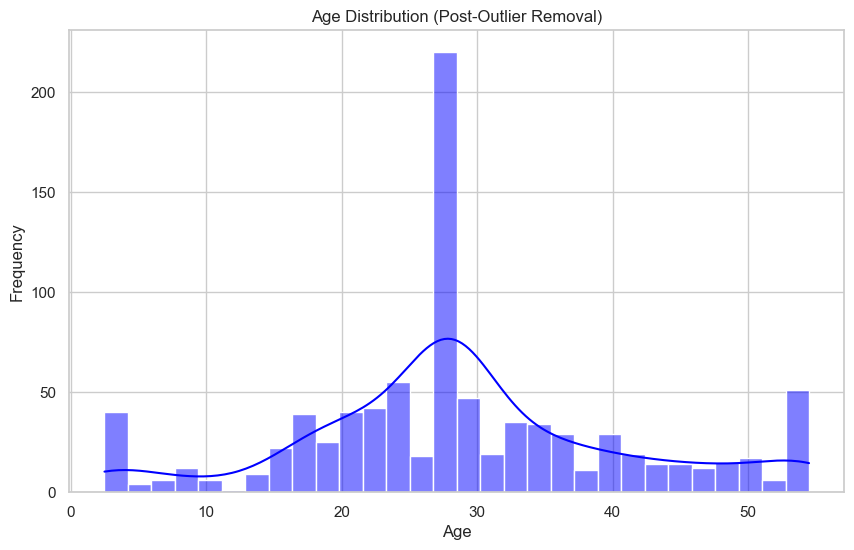

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn style
sns.set(style="whitegrid")

# 1. Distribution of Age (Post-Outlier Removal)
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution (Post-Outlier Removal)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

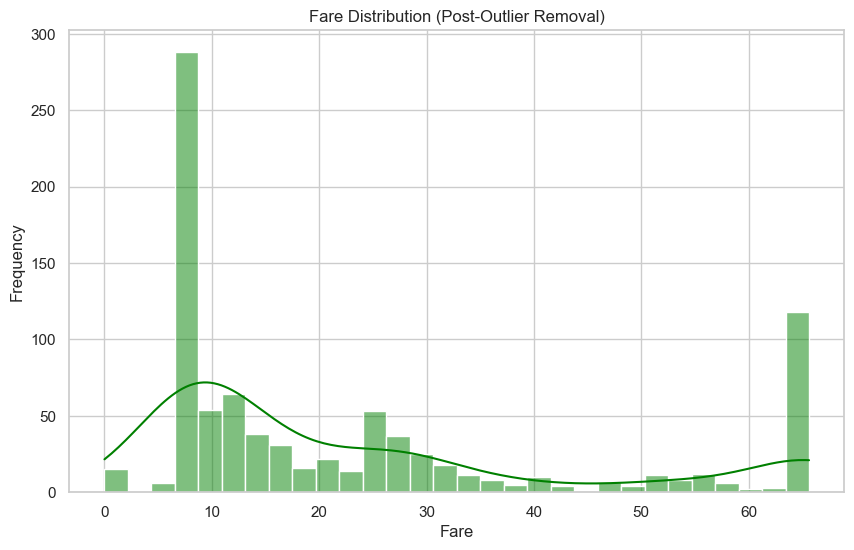

In [43]:
# 2. Distribution of Fare (Post-Outlier Removal)
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution (Post-Outlier Removal)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

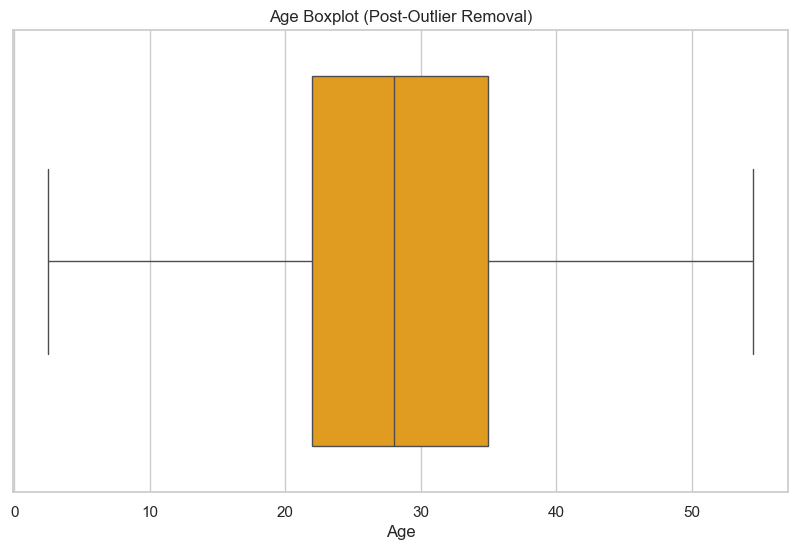

In [44]:
# 3. Boxplot of Age (Post-Outlier Removal)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_encoded['Age'], color='orange')
plt.title('Age Boxplot (Post-Outlier Removal)')
plt.xlabel('Age')
plt.show()

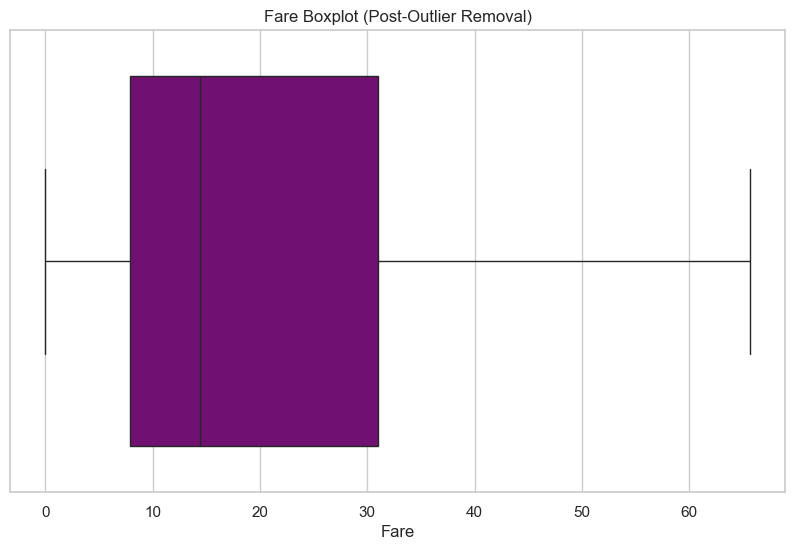

In [45]:
# 4. Boxplot of Fare (Post-Outlier Removal)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_encoded['Fare'], color='purple')
plt.title('Fare Boxplot (Post-Outlier Removal)')
plt.xlabel('Fare')
plt.show()

C:\Users\Bharani S\AppData\Local\Temp\ipykernel_16872\37009017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data_encoded, palette="Blues_d")


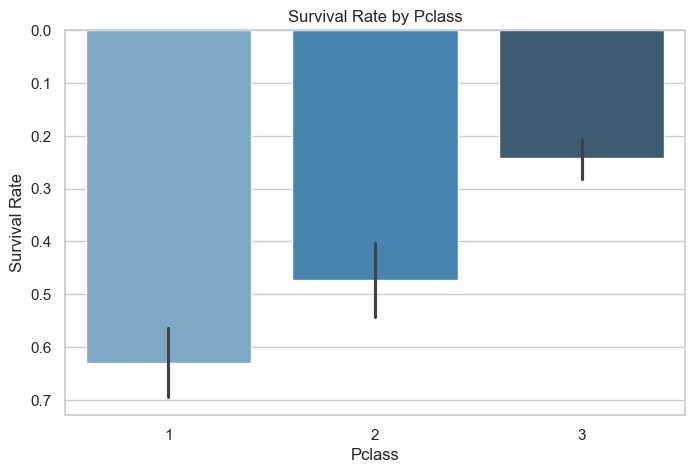

In [46]:
# 5. Survival Rate by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data_encoded, palette="Blues_d")
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\Bharani S\AppData\Local\Temp\ipykernel_16872\694563346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data_encoded, palette="Pastel1")


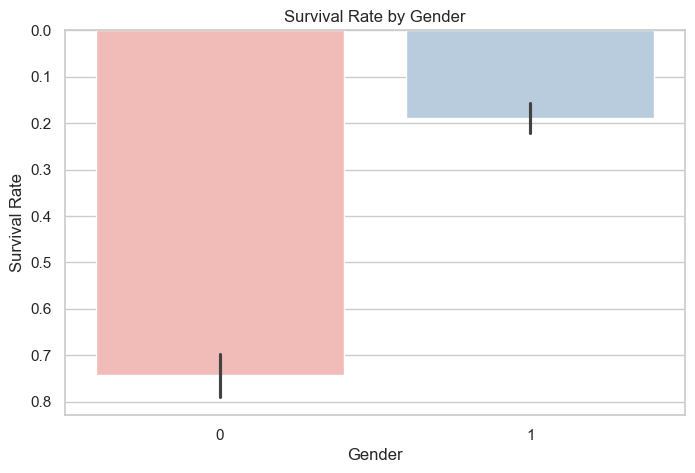

In [47]:
# 6. Survival Rate by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data_encoded, palette="Pastel1")
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\Bharani S\AppData\Local\Temp\ipykernel_16872\4206491749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=data_encoded, palette="coolwarm")


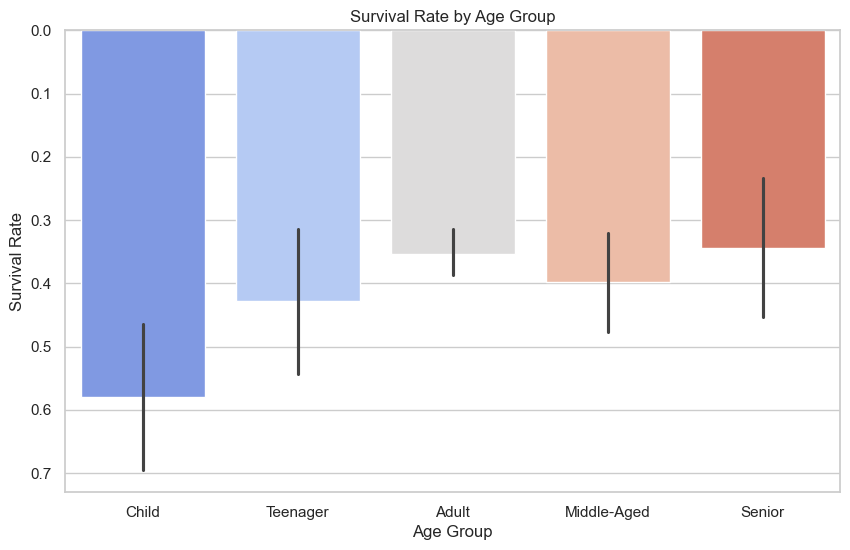

In [48]:
# 7. Survival Rate by Age Group
# Create age groups
bins = [0, 12, 18, 35, 50, 100]
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
data_encoded['AgeGroup'] = pd.cut(data_encoded['Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=data_encoded, palette="coolwarm")
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

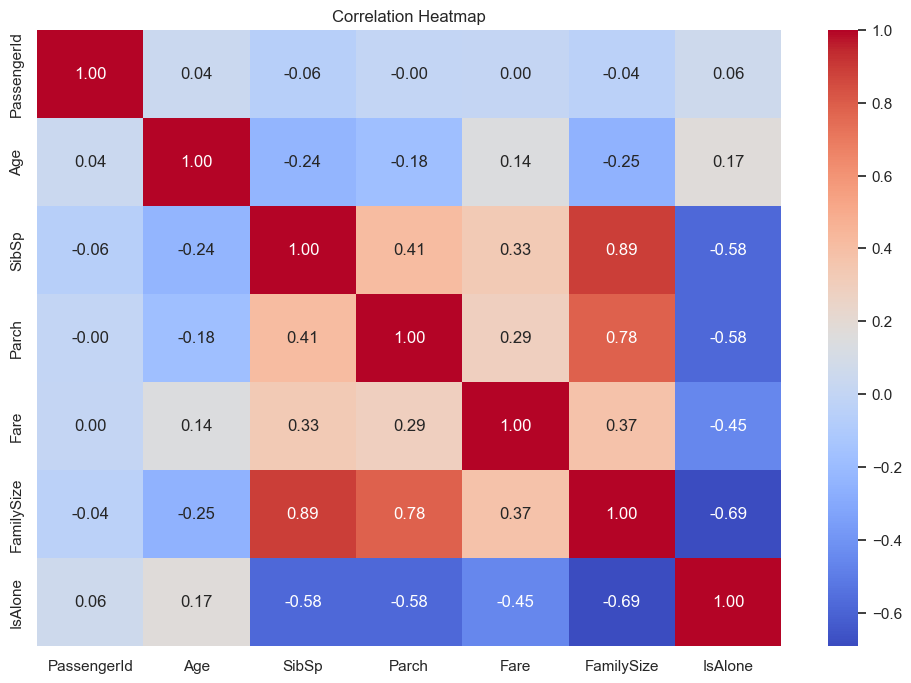

In [50]:
# 8. Correlation Heatmap (Excluding non-numeric columns)
# Selecting only numeric columns
numeric_data = data_encoded.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  # Calculate correlation on numeric data only
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [52]:
# Check column names in the dataframe
print(data_encoded.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q',
       'Embarked_S', 'AgeGroup_Teenager', 'AgeGroup_Adult', 'AgeGroup_Senior',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess', 'AgeGroup'],
      dtype='object')


C:\Users\Bharani S\AppData\Local\Temp\ipykernel_16872\2612605150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data_replace_outliers, palette='muted')


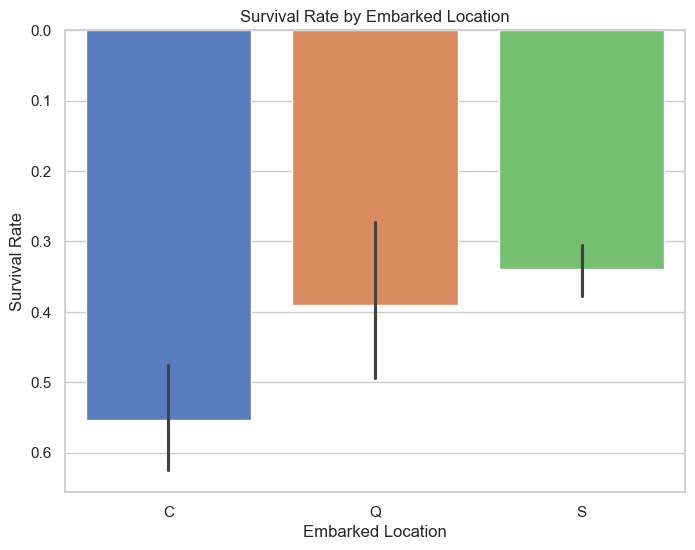

In [53]:
# 9. Survival Rate by Embarked Location using 'data_replace_outliers'
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=data_replace_outliers, palette='muted')
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\Bharani S\AppData\Local\Temp\ipykernel_16872\3529461955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=data_encoded, palette='Set2')


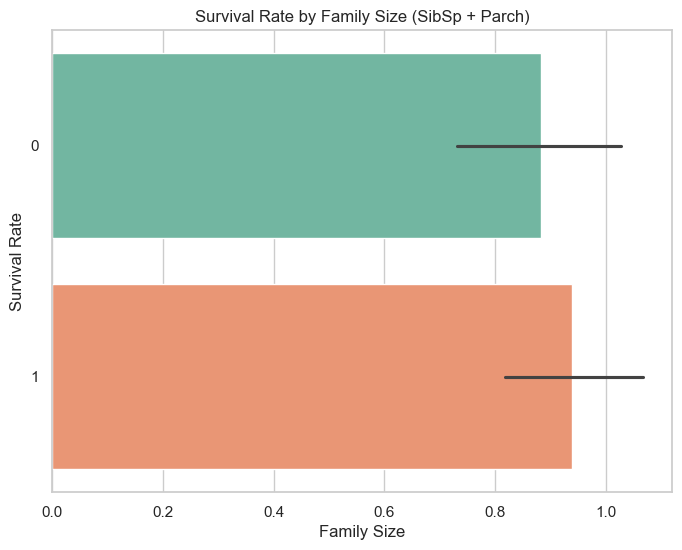

In [54]:
# 10. Survival by SibSp/Parch (Family Size Analysis)
data_encoded['FamilySize'] = data_encoded['SibSp'] + data_encoded['Parch']

plt.figure(figsize=(8, 6))
sns.barplot(x='FamilySize', y='Survived', data=data_encoded, palette='Set2')
plt.title('Survival Rate by Family Size (SibSp + Parch)')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


C:\Users\Bharani S\AppData\Local\Temp\ipykernel_16872\4263563316.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Survived', data=data_encoded, palette='Set3')


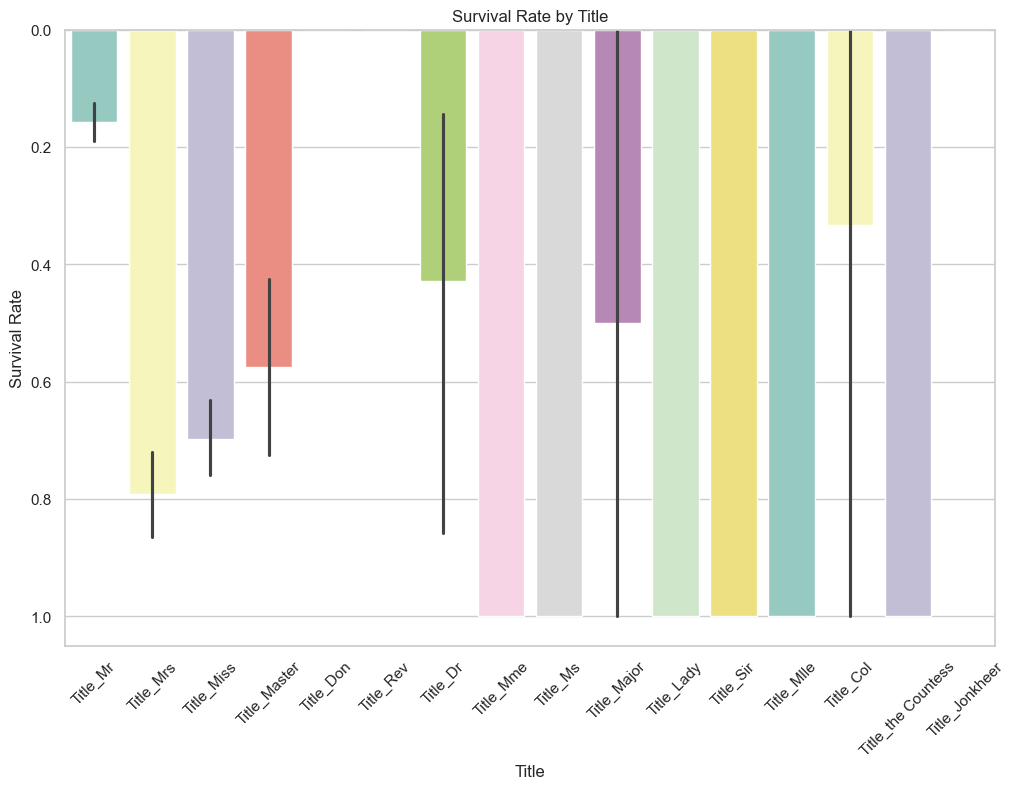

In [55]:
# 11. Survival Rate by Title
# Assuming 'Title' columns are binary-encoded (e.g., Title_Mr, Title_Miss)
title_columns = [col for col in data_encoded.columns if col.startswith('Title_')]
data_encoded['Title'] = data_encoded[title_columns].idxmax(axis=1)  # Get the title with highest importance

plt.figure(figsize=(12, 8))
sns.barplot(x='Title', y='Survived', data=data_encoded, palette='Set3')
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()


C:\Users\Bharani S\AppData\Local\Temp\ipykernel_16872\340758735.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='FamilySize', y='Survived', data=data_replace_outliers, palette='coolwarm')


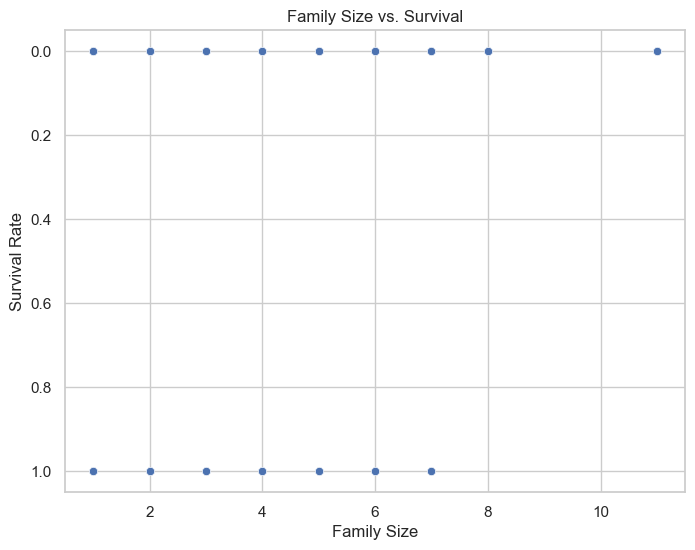

In [57]:
# 12. Family Size vs. Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FamilySize', y='Survived', data=data_replace_outliers, palette='coolwarm')
plt.title('Family Size vs. Survival')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()
